In [1]:
import pandas as pd

In [2]:
sep_loss = pd.read_csv('losses_Sep2019.csv', header=None)
sep_loss.columns = ['RUN', 'LOSS']
sep_loss['STAGE'] = sep_loss['RUN'].str.count('\.')

In [3]:
# sep_loss = sep_loss[(sep_loss['STAGE'] == 4) & (sep_loss['LOSS'] > 0.02)]
sep_loss

,RUN,LOSS,STAGE
0,1.1,0.009562,1
1,1.1.1,0.009048,2
2,1.1.1.1,0.011402,3
3,1.1.1.1.1,0.014135,4
4,1.1.1.1.1.1,0.013904,5
...,...,...,...
2232,1.4.4.4.4.3.2,0.009119,6
2233,1.4.4.4.4.4,0.009295,5
2234,1.4.4.4.4.4.1,0.006071,6
2235,1.4.4.4.4.4.2,0.016203,6


In [4]:
nov_loss = pd.read_csv('losses_Nov2019.csv', header=None)
nov_loss.columns = ['RUN', 'LOSS']
nov_loss['STAGE'] = nov_loss['RUN'].str.count('\.')

In [5]:
nov_loss

,RUN,LOSS,STAGE
0,1.1,0.009339,1
1,1.2,0.009153,1
2,1.3,0.009394,1
3,1.4,0.008842,1
4,1.1.1,0.009297,2
...,...,...,...
79,1.4.3.4,0.008583,3
80,1.4.4.1,0.006957,3
81,1.4.4.2,0.009814,3
82,1.4.4.3,0.008101,3


In [6]:
nov_loss_st = pd.read_csv('losses_Nov2019_stepped.csv', header=None)
nov_loss_st.columns = ['RUN', 'LOSS']
nov_loss_st['STAGE'] = nov_loss_st['RUN'].str.count('\.')
nov_loss_st

,RUN,LOSS,STAGE
0,1.1,0.009412,1
1,1.2,0.009179,1
2,1.3,0.009105,1
3,1.4,0.008703,1
4,1.1.1,0.009226,2
...,...,...,...
1359,1.4.4.4.3.4,0.006307,5
1360,1.4.4.4.4.1,0.005678,5
1361,1.4.4.4.4.2,0.004087,5
1362,1.4.4.4.4.3,0.005934,5


In [7]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

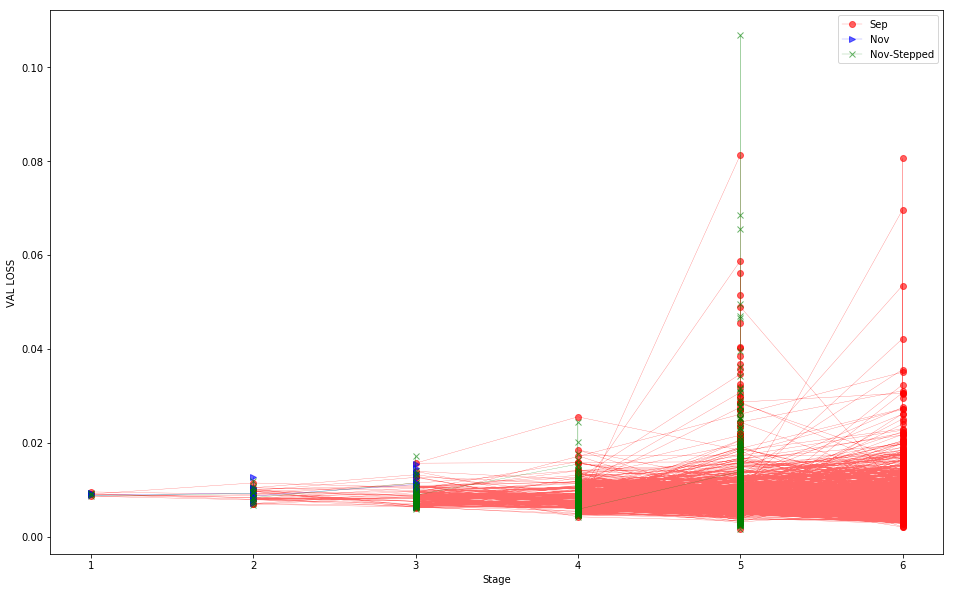

In [12]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(sep_loss['STAGE'], sep_loss['LOSS'], color='r', marker='o',linestyle='-', linewidth=0.3, alpha=0.6, label='Sep')
ax.plot(nov_loss['STAGE'], nov_loss['LOSS'], color='b', marker='>',linestyle='-', linewidth=0.3, alpha=0.6, label='Nov')
ax.plot(nov_loss_st['STAGE'], nov_loss_st['LOSS'], color='g', marker='x', linestyle='-', linewidth=0.3, alpha=0.6, label='Nov-Stepped')
ax.set_xlabel('Stage')
ax.set_ylabel('VAL LOSS')
ax.legend()
plt.show()

In [10]:
mean_sep = sep_loss.groupby('STAGE')['LOSS'].mean()
mean_nov = nov_loss.groupby('STAGE')['LOSS'].mean()
mean_nov2 = nov_loss_st.groupby('STAGE')['LOSS'].mean()
std_sep = sep_loss.groupby('STAGE')['LOSS'].std()
std_nov = nov_loss.groupby('STAGE')['LOSS'].std()
std_nov2 = nov_loss_st.groupby('STAGE')['LOSS'].std()

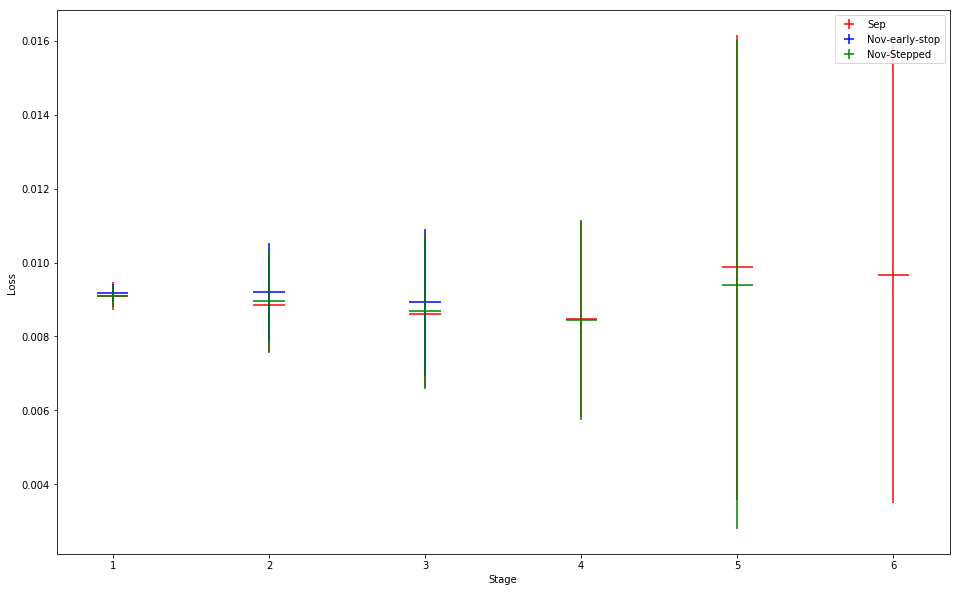

In [11]:
fig, ax1 = plt.subplots(figsize=(16,10))
ax1.errorbar(mean_sep.index, mean_sep, xerr=0.1, yerr=std_sep, color='r', linestyle='', label='Sep')
ax1.errorbar(mean_nov.index, mean_nov, xerr=0.1, yerr=std_nov, color='b', linestyle='', label='Nov-early-stop')
ax1.errorbar(mean_nov2.index, mean_nov2, xerr=0.1, yerr=std_nov2, color='g', linestyle='', label='Nov-Stepped')
ax1.set_xlabel('Stage')
ax1.set_ylabel('Loss')
ax1.legend(loc='best', prop={'size': 10})
plt.show()

In [27]:
sep_loss[(sep_loss['LOSS'] < 0.005) & (sep_loss['STAGE'] == 5)]

,RUN,LOSS,STAGE
5,1.1.1.1.1.2,0.003414,5
38,1.1.1.2.1.2,0.003298,5
55,1.1.1.2.3.3,0.004090,5
70,1.1.1.3.1.1,0.004027,5
78,1.1.1.3.2.1,0.004556,5
...,...,...,...
2140,1.4.4.2.2.1,0.003526,5
2167,1.4.4.3.1.2,0.003989,5
2175,1.4.4.3.2.2,0.003075,5
2201,1.4.4.4.1.2,0.003786,5


In [17]:
nov_loss[nov_loss['LOSS'] < 0.0055]

,RUN,LOSS,STAGE


In [32]:
nov_loss_st[(nov_loss_st['LOSS'] < 0.005) & (nov_loss_st['STAGE'] == 5)]

,RUN,LOSS,STAGE
341,1.1.1.1.1.2,0.003084,5
345,1.1.1.1.2.2,0.003801,5
357,1.1.1.2.1.2,0.002686,5
360,1.1.1.2.2.1,0.004785,5
366,1.1.1.2.3.3,0.004168,5
...,...,...,...
1310,1.4.4.1.3.3,0.003491,5
1314,1.4.4.1.4.3,0.004403,5
1320,1.4.4.2.2.1,0.004113,5
1349,1.4.4.4.1.2,0.003567,5


In [23]:
nov_loss_st[nov_loss_st['STAGE'] == 5]

,RUN,LOSS,STAGE
340,1.1.1.1.1.1,0.013925,5
341,1.1.1.1.1.2,0.003084,5
342,1.1.1.1.1.3,0.007928,5
343,1.1.1.1.1.4,0.015290,5
344,1.1.1.1.2.1,0.008257,5
...,...,...,...
1359,1.4.4.4.3.4,0.006307,5
1360,1.4.4.4.4.1,0.005678,5
1361,1.4.4.4.4.2,0.004087,5
1362,1.4.4.4.4.3,0.005934,5


In [38]:
sep_loss[(sep_loss['RUN'] == '1.3.1.2.1') | (sep_loss['RUN'] == '1.3.1.2') | (sep_loss['RUN'] == '1.3.1')| (sep_loss['RUN'] == '1.3')]

,RUN,LOSS,STAGE
1118,1.3,0.009121,1
1119,1.3.1,0.011472,2
1153,1.3.1.2,0.015678,3
1154,1.3.1.2.1,0.025544,4


In [39]:
nov_loss[(nov_loss['RUN'] == '1.3.1.2.1') | (nov_loss['RUN'] == '1.3.1.2') | (nov_loss['RUN'] == '1.3.1')| (nov_loss['RUN'] == '1.3')]

,RUN,LOSS,STAGE
2,1.3,0.009394,1
12,1.3.1,0.012709,2
53,1.3.1.2,0.015544,3


In [40]:
nov_loss_st[(nov_loss_st['RUN'] == '1.3.1.2.1') | (nov_loss_st['RUN'] == '1.3.1.2') | (nov_loss_st['RUN'] == '1.3.1')| (nov_loss_st['RUN'] == '1.3')]

,RUN,LOSS,STAGE
2,1.3,0.009105,1
12,1.3.1,0.011965,2
53,1.3.1.2,0.017133,3
216,1.3.1.2.1,0.024418,4
